# Homework 3 (CIFAR-10)

In [1]:
# import analysis packages
import keras
from keras.applications import ResNet50, VGG16
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers import AveragePooling2D, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

### Data Cleaning

In [3]:
# import dataset
(imgTrain, lblTrain), (imgTest, lblTest) = cifar10.load_data()

(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

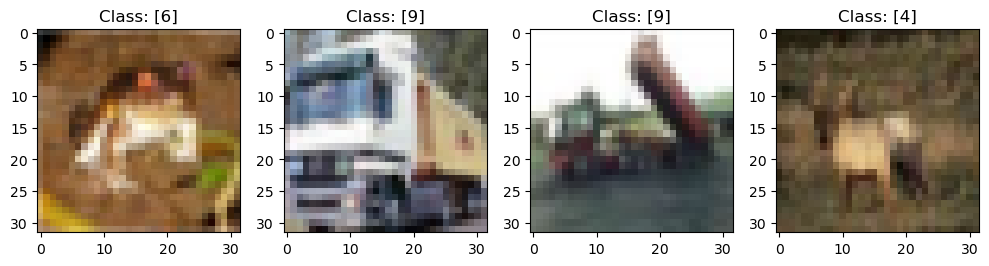

In [4]:
# check dimensions of data
display(imgTrain.shape)
display(lblTrain.shape)
display(imgTest.shape)
display(lblTest.shape)

# plot first few training images
myplot, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
for i in range(4):
    axes[i].imshow(imgTrain[i], cmap=plt.cm.binary)
    axes[i].title.set_text(f"Class: {lblTrain[i]}")
myplot.tight_layout()

In [5]:
# scale image data
imgTrain = imgTrain.astype('float32') / 255
imgTest = imgTest.astype('float32') / 255

# factor categorical response
lblTrain = to_categorical(lblTrain)
lblTest = to_categorical(lblTest)

### Model Fitting

In [6]:
# model fitting and evaluation function
def EvaluateModel(model, BATCH = 32):
    # set random seed
    np.random.seed(4252023)
    tf.random.set_seed(4252023)

    # compile model
    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    PRINTSUM = False
    try:
        # model summary
        model.summary()
    except:
        PRINTSUM = True
        pass

    # number of epochs
    EPOCHS = 50

    # early stopping criteria
    earlyStop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

    # train model
    trained = model.fit(imgTrain, 
                        lblTrain, 
                        epochs = EPOCHS, 
                        batch_size = BATCH, 
                        validation_split = 0.2,
                        callbacks = earlyStop,
                        verbose = 2)
    
    # if PRINTSUM:
        # model summary
        # model.summary()

    # prepare model evaluation
    acc = trained.history['accuracy']
    val_acc = trained.history['val_accuracy']
    loss = trained.history['loss']
    val_loss = trained.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # final validation accuracy
    display(f"Validation accuracy: {round(val_acc[-1] * 100, 2)}%")

    # plot training accuracy
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))
    ax1.plot(epochs, acc, 'bo', label = 'Training acc')
    ax1.plot(epochs, val_acc, 'b', label = 'Validation acc')
    ax1.set(xlabel = 'Epochs', ylabel = 'Accuracy')
    ax1.legend()
    ax2.plot(epochs, loss, 'bo', label = 'Training loss')
    ax2.plot(epochs, val_loss, 'b', label = 'Validation loss')
    ax2.set(xlabel = 'Epochs', ylabel = 'Loss')
    ax2.legend()
    fig.suptitle('Evaluation Metrics')

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 10)                72010     
                                                                 
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2023-04-29 22:26:43.397547: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1250/1250 - 13s - loss: 1.5485 - accuracy: 0.4546 - val_loss: 1.3533 - val_accuracy: 0.5312 - 13s/epoch - 10ms/step
Epoch 2/50
1250/1250 - 15s - loss: 1.2713 - accuracy: 0.5600 - val_loss: 1.2274 - val_accuracy: 0.5838 - 15s/epoch - 12ms/step
Epoch 3/50
1250/1250 - 13s - loss: 1.1748 - accuracy: 0.5934 - val_loss: 1.2488 - val_accuracy: 0.5585 - 13s/epoch - 10ms/step
Epoch 4/50
1250/1250 - 12s - loss: 1.1129 - accuracy: 0.6188 - val_loss: 1.1906 - val_accuracy: 0.5985 - 12s/epoch - 9ms/step
Epoch 5/50
1250/1250 - 12s - loss: 1.0567 - accuracy: 0.6370 - val_loss: 1.1663 - val_accuracy: 0.6085 - 12s/epoch - 9ms/step
Epoch 6/50
1250/1250 - 12s - loss: 1.0160 - accuracy: 0.6524 - val_loss: 1.1377 - val_accuracy: 0.6158 - 12s/epoch - 10ms/step
Epoch 7/50
1250/1250 - 12s - loss: 0.9833 - accuracy: 0.6657 - val_loss: 1.1140 - val_accuracy: 0.6232 - 12s/epoch - 10ms/step
Epoch 8/50
1250/1250 - 12s - loss: 0.9493 - accuracy: 0.6783 - val_loss: 1.0896 - val_accuracy: 0.6400 - 12s/epoch - 10ms/st

'Validation accuracy: 63.79%'

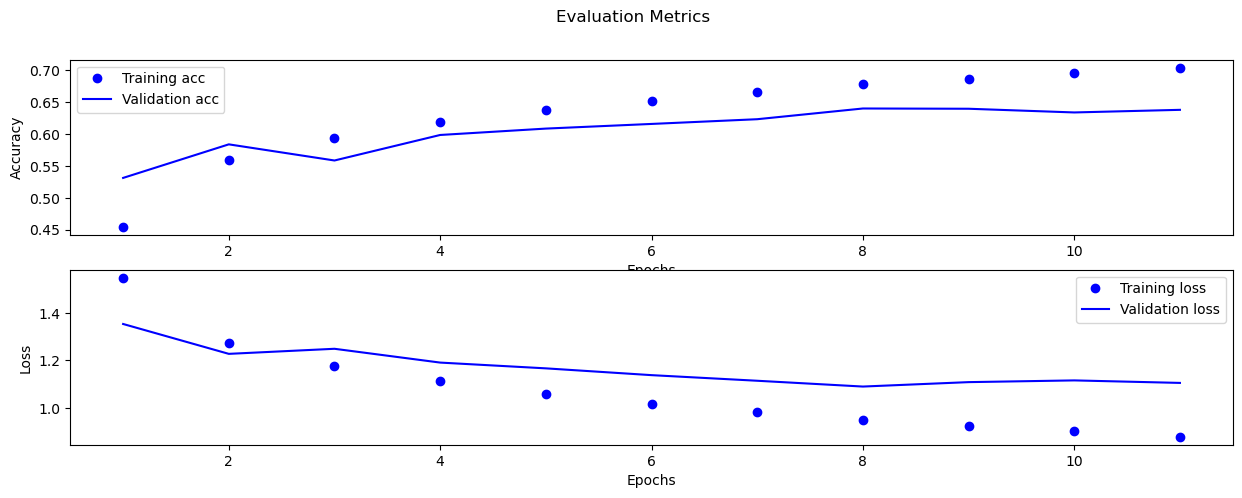

In [6]:
# define model architecture
model = models.Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten_1 (Flatten)         (None, 512)              

'Validation accuracy: 69.06%'

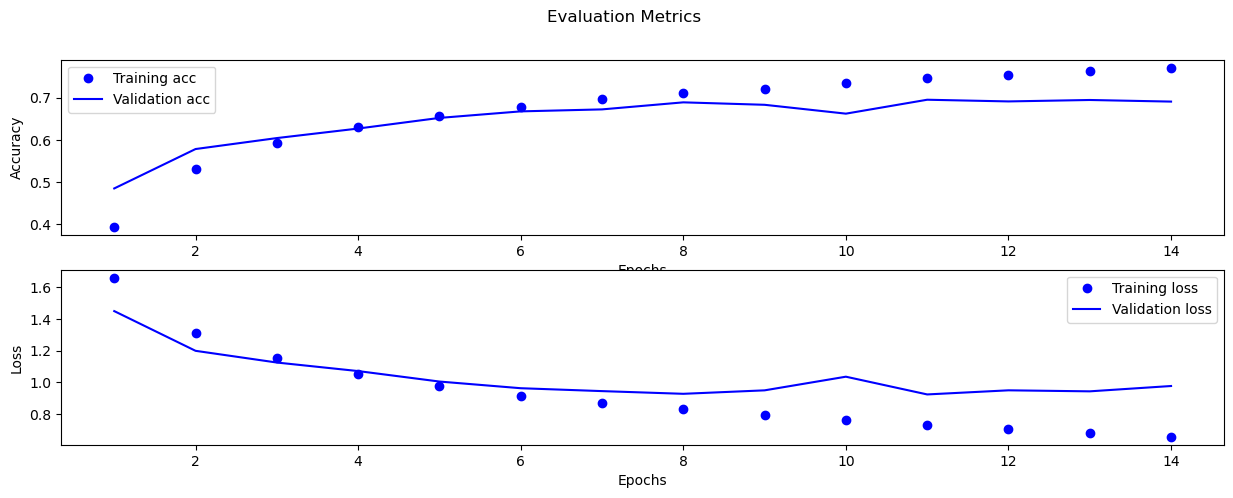

In [7]:
# define model architecture
model = models.Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 32)          36896     
                                                                 
 flatten_2 (Flatten)         (None, 512)              

'Validation accuracy: 70.26%'

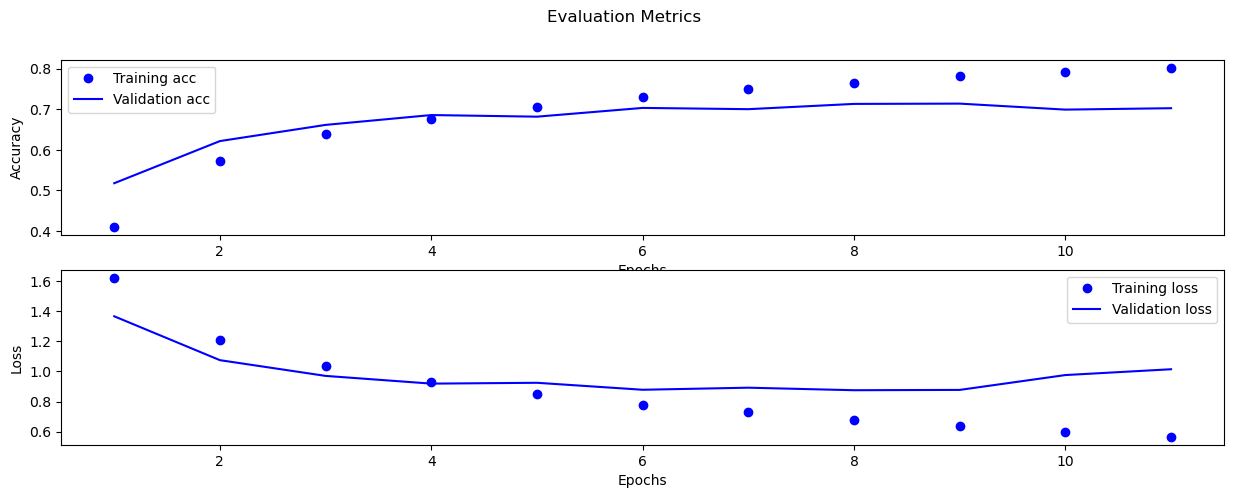

In [8]:
# define model architecture
model = models.Sequential([
    Conv2D(128, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 32)          36896     
                                                                 
 flatten_3 (Flatten)         (None, 2048)             

'Validation accuracy: 71.65%'

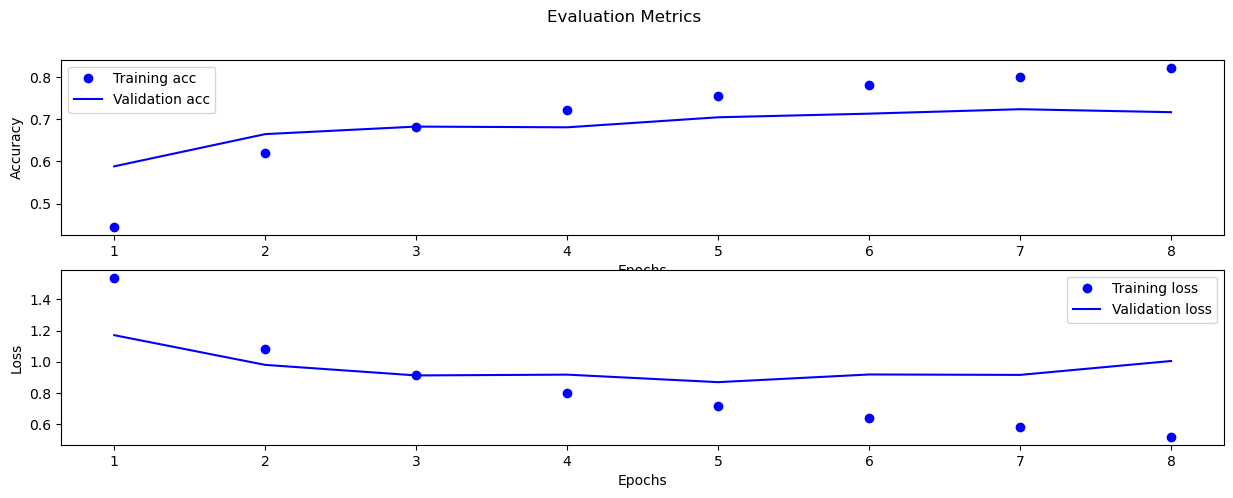

In [9]:
# define model architecture
model = models.Sequential([
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 32)        25632     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 32)         0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 120)              

'Validation accuracy: 68.47%'

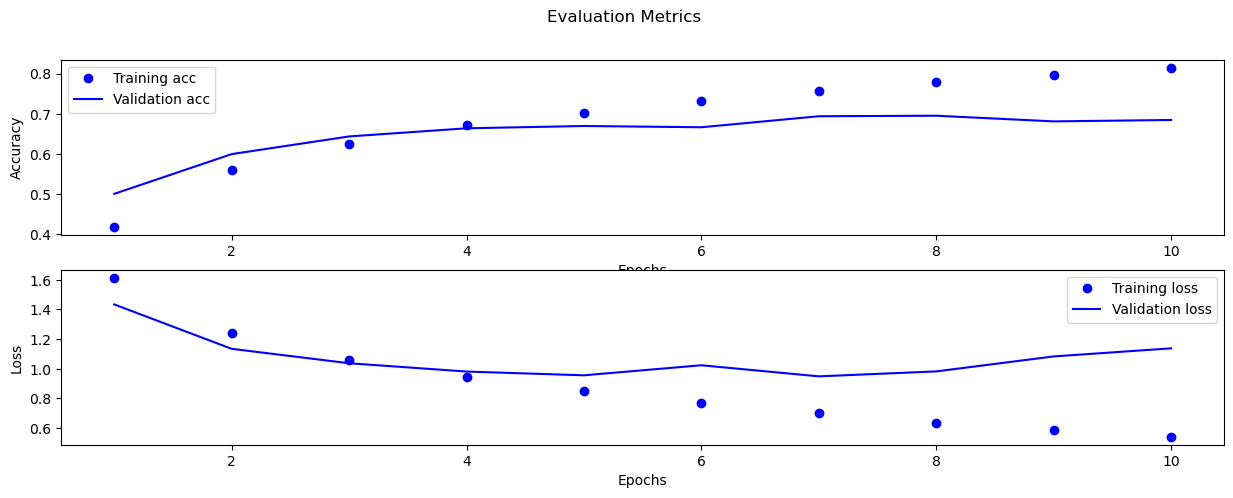

In [10]:
# define model architecture
model = models.Sequential([
    Conv2D(32, (5, 5), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
    AveragePooling2D((2, 2), 2),
    Conv2D(32, (5, 5), padding = 'same', activation = 'relu'),
    AveragePooling2D((2, 2), 2),
    Flatten(),
    Dense(120, activation = 'relu'),
    Dense(84, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       9728      
                                                                 
 average_pooling2d_2 (Averag  (None, 16, 16, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       409728    
                                                                 
 average_pooling2d_3 (Averag  (None, 8, 8, 128)        0         
 ePooling2D)                                                     
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 120)              

'Validation accuracy: 69.46%'

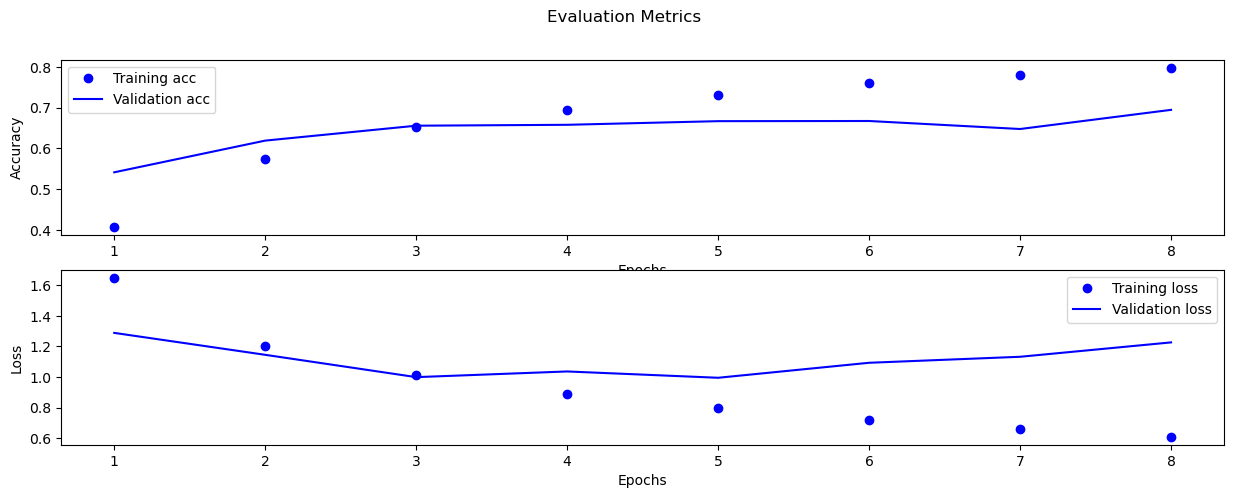

In [11]:
# define model architecture
model = models.Sequential([
    Conv2D(128, (5, 5), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
    AveragePooling2D((2, 2), 2),
    Conv2D(128, (5, 5), padding = 'same', activation = 'relu'),
    AveragePooling2D((2, 2), 2),
    Flatten(),
    Dense(120, activation = 'relu'),
    Dense(84, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

In [8]:
# define model architecture
model = models.Sequential([
    RandomRotation(factor = 0.5, fill_mode = 'constant', fill_value = 0, seed = 42923),
    RandomZoom(height_factor = (-0.2, -0.05), width_factor = (-0.2, -0.05), seed = 42923),
    RandomFlip(seed = 42923),
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model, 16)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/50


2023-04-29 23:06:15.794703: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2500/2500 - 123s - loss: 1.9122 - accuracy: 0.2987 - val_loss: 1.7158 - val_accuracy: 0.3869 - 123s/epoch - 49ms/step
Epoch 2/50
2500/2500 - 125s - loss: 1.6997 - accuracy: 0.3889 - val_loss: 1.7180 - val_accuracy: 0.4007 - 125s/epoch - 50ms/step
Epoch 3/50
2500/2500 - 123s - loss: 1.6378 - accuracy: 0.4171 - val_loss: 1.6247 - val_accuracy: 0.4212 - 123s/epoch - 49ms/step
Epoch 4/50
2500/2500 - 123s - loss: 1.6034 - accuracy: 0.4324 - val_loss: 1.6244 - val_accuracy: 0.4426 - 123s/epoch - 49ms/step
Epoch 5/50
2500/2500 - 124s - loss: 1.5869 - accuracy: 0.4391 - val_loss: 1.5862 - val_accuracy: 0.4417 - 124s/epoch - 50ms/step
Epoch 6/50


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 23,719,498
Trainable params: 131,786
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/50


2023-04-30 00:06:39.967306: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1250/1250 - 42s - loss: 2.1303 - accuracy: 0.2078 - val_loss: 1.9833 - val_accuracy: 0.2724 - 42s/epoch - 33ms/step
Epoch 2/50
1250/1250 - 36s - loss: 1.9543 - accuracy: 0.2849 - val_loss: 1.9008 - val_accuracy: 0.3112 - 36s/epoch - 29ms/step
Epoch 3/50
1250/1250 - 36s - loss: 1.8927 - accuracy: 0.3118 - val_loss: 1.8643 - val_accuracy: 0.3236 - 36s/epoch - 29ms/step
Epoch 4/50
1250/1250 - 37s - loss: 1.8591 - accuracy: 0.3262 - val_loss: 1.8226 - val_accuracy: 0.3339 - 37s/epoch - 29ms/step
Epoch 5/50
1250/1250 - 36s - loss: 1.8331 - accuracy: 0.3389 - val_loss: 1.8032 - val_accuracy: 0.3443 - 36s/epoch - 28ms/step
Epoch 6/50
1250/1250 - 35s - loss: 1.8121 - accuracy: 0.3465 - val_loss: 1.7954 - val_accuracy: 0.3372 - 35s/epoch - 28ms/step
Epoch 7/50
1250/1250 - 36s - loss: 1.8003 - accuracy: 0.3520 - val_loss: 1.7392 - val_accuracy: 0.3808 - 36s/epoch - 29ms/step
Epoch 8/50
1250/1250 - 36s - loss: 1.7850 - accuracy: 0.3562 - val_loss: 1.7409 - val_accuracy: 0.3786 - 36s/epoch - 29ms/

'Validation accuracy: 36.34%'

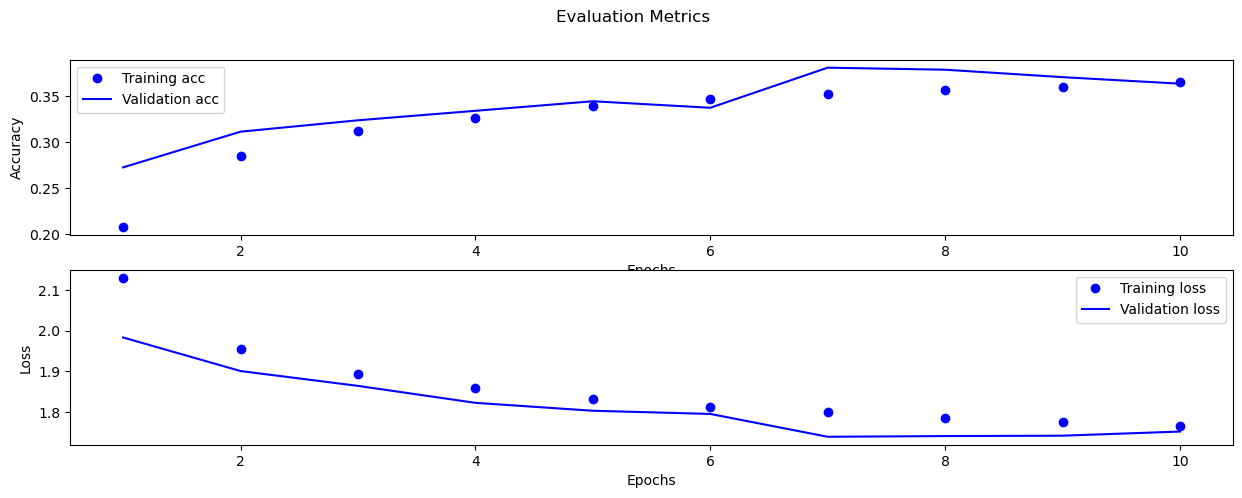

In [7]:
# import pretrained structures
ResNetBase = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
ResNetBase.trainable = False

# define model architecture
model = models.Sequential([
    ResNetBase,
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_10 (Flatten)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 64)                131136    
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 23,719,498
Trainable params: 164,682
Non-trainable params: 23,554,816
_________________________________________________________________
Epoch 1/50
1250/1250 - 67s - loss: 2.1718 - accuracy: 0.1787 - val_loss: 1.9328 - val_accuracy: 0.2595 - 67s/epoch - 53ms/step
Epoch 2/50
1250/1250 - 61s - loss: 1.919

'Validation accuracy: 40.1%'

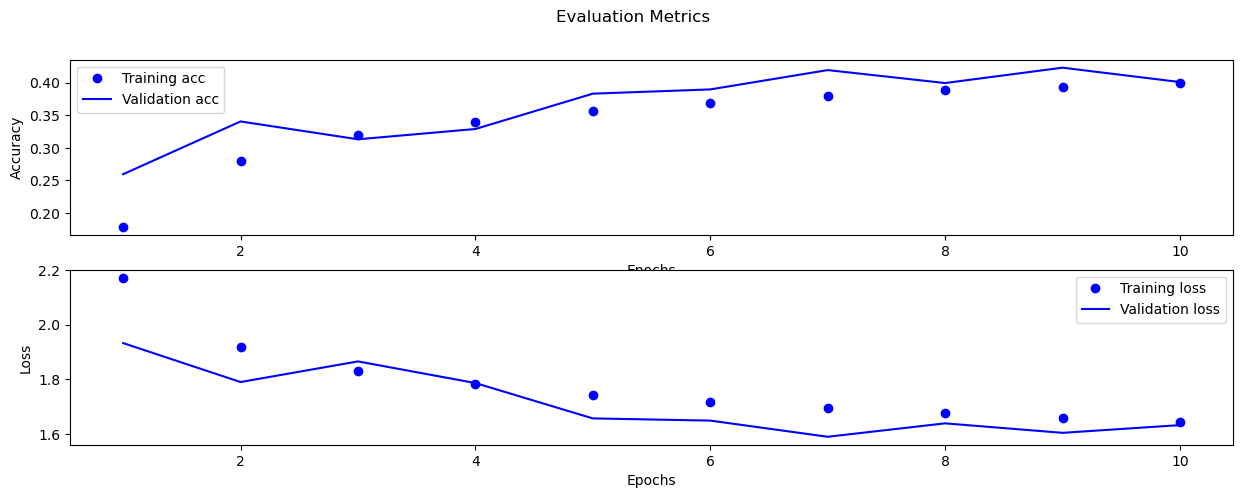

In [21]:
# set trainable layers
ResNetBase = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
ResNetBase.trainable = True
for layer in ResNetBase.layers:
    if layer.name in ['conv3_block1_1_conv']:
        layer.trainable = True
    else:
        layer.trainable = False

# define model architecture
model = models.Sequential([
    ResNetBase,
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

58889256/58889256 [==============================] - 5s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/50
1250/1250 - 23s - loss: 1.4502 - accuracy: 0.4979 - val_loss: 1.2996 - val_accuracy: 0.5441 -

'Validation accuracy: 60.13%'

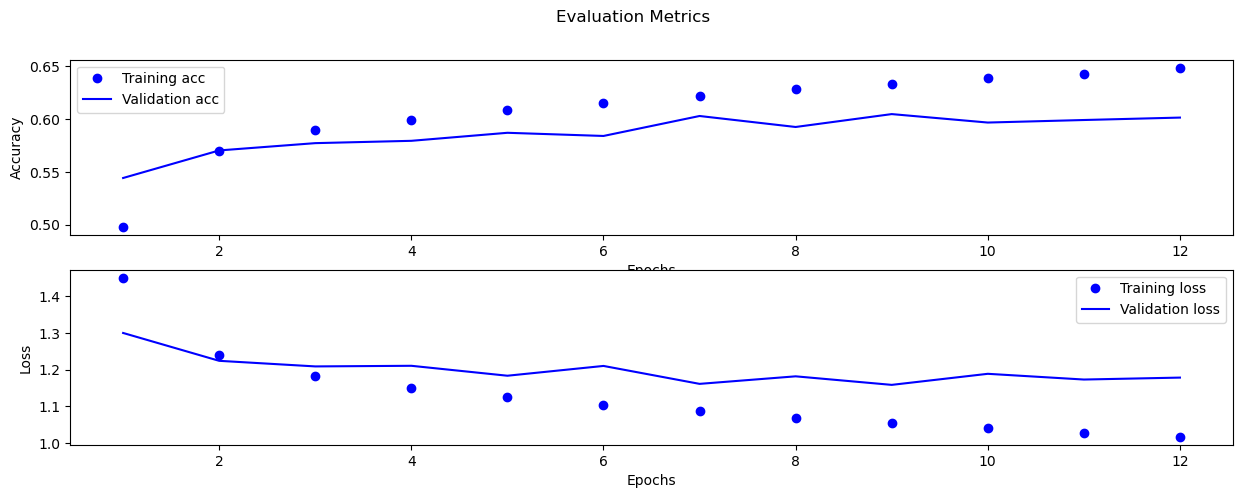

In [9]:
# import pretrained structures
VGGBase = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
VGGBase.trainable = False

# define model architecture
model = models.Sequential([
    VGGBase,
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,748,170
Trainable params: 402,506
Non-trainable params: 14,345,664
_________________________________________________________________
Epoch 1/50
1250/1250 - 41s - loss: 1.4125 - accuracy: 0.4895 - val_loss: 1.0864 - val_accuracy: 0.6140 - 41s/epoch - 33ms/step
Epoch 2/50
1250/1250 - 38s - loss: 1.0105

'Validation accuracy: 76.94%'

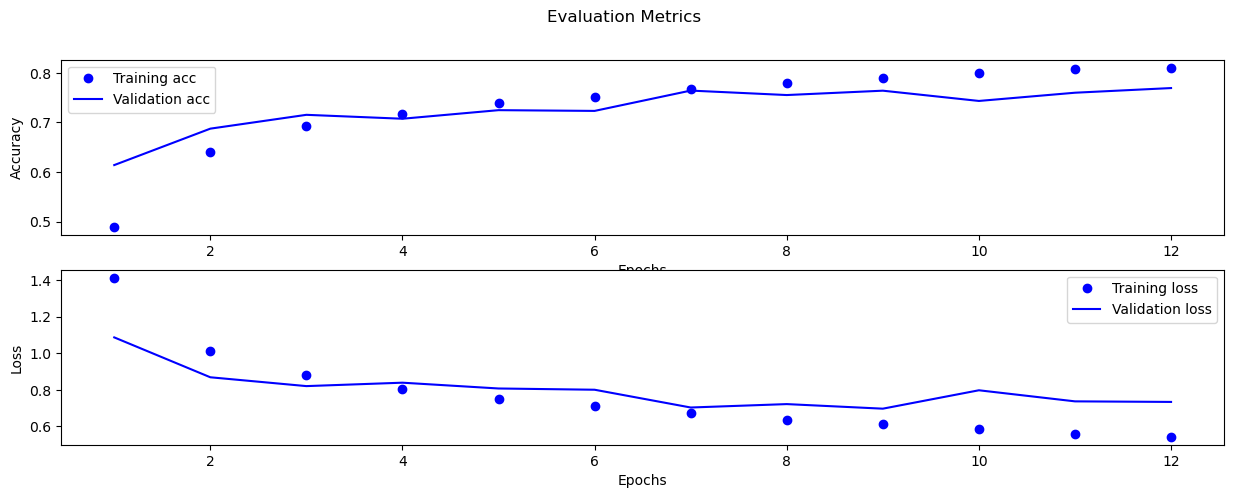

In [12]:
# set trainable layers
VGGBase = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
VGGBase.trainable = True
for layer in VGGBase.layers:
    if layer.name in ['block2_conv1', 'block3_conv1']:
        layer.trainable = True
    else:
        layer.trainable = False

# define model architecture
model = models.Sequential([
    VGGBase,
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                32832     
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 14,752,330
Trainable params: 332,810
Non-trainable params: 14,419,520
_________________________________________________________________
Epoch 1/50
1250/1250 - 35s - loss: 

'Validation accuracy: 70.65%'

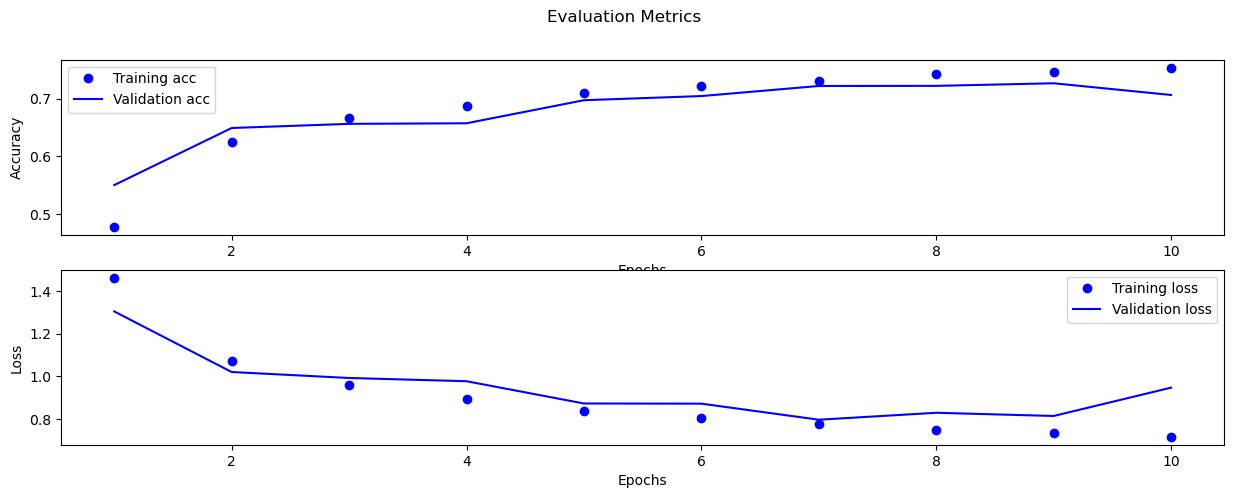

In [22]:
# set trainable layers
VGGBase = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
VGGBase.trainable = True
for layer in VGGBase.layers:
    if layer.name in ['block3_conv1']:
        layer.trainable = True
    else:
        layer.trainable = False

# define model architecture
model = models.Sequential([
    VGGBase,
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)